In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import gaussian_spectrum_1D
from scipy.linalg import eig, norm
import numpy.matlib


In [2]:
def generate_signal(T, epsilon, sample_period=1.0): 
    
    #generate random signal with average freq spectrum of PSD
    
    rand_signal = np.random.rand(T)
    return gaussian_spectrum_1D(rand_signal, epsilon, sample_period)

In [3]:
# Generate a 1D-image of length L = 10000 pixels

image=generate_signal(T=10000, epsilon=0.04)


In [4]:
l=100
X = np.array([image[i:i+l] for i in range(9900)])
X

array([[1.24077357e-04, 8.56182907e-05, 4.58843379e-05, ...,
        1.08872803e-04, 8.91132932e-05, 9.66404189e-05],
       [8.56182907e-05, 4.58843379e-05, 7.21136348e-05, ...,
        8.91132932e-05, 9.66404189e-05, 5.62896989e-05],
       [4.58843379e-05, 7.21136348e-05, 2.90899684e-05, ...,
        9.66404189e-05, 5.62896989e-05, 5.06259671e-05],
       ...,
       [1.12414756e-04, 9.09997694e-05, 5.71451268e-05, ...,
        3.35658275e-05, 5.67293479e-05, 1.16769931e-04],
       [9.09997694e-05, 5.71451268e-05, 4.47915318e-05, ...,
        5.67293479e-05, 1.16769931e-04, 1.16786996e-04],
       [5.71451268e-05, 4.47915318e-05, 8.40989408e-05, ...,
        1.16769931e-04, 1.16786996e-04, 1.21402677e-04]])

In [5]:
# Extracting time dependent receptive field input
l=100 #pixels

#X = np.array([image[i:i+l] for i in range(9900)]).T

for i in range(9900):
    op=[image[i:i+l]]
    op1=np.array(op)
X=op1.T

    
#input average to individual pixel of receptive field = zero

m=np.matlib.repmat(X.mean(axis=1), 9900, 1).T
X=X-m

In [6]:
# Computing covariance matrix C of    signal X
C=np.cov(X)

# computing matrix C ̇ of  temporal derivative's 2nd moment
X_dot=np.diff(X, axis=1)
Cdot=X_dot.dot(X_dot.T)/X_dot.shape[1]


In [7]:
#Generalised Eigenvalue Problem 
w,W=eig(Cdot, C)

# Extracting 5 slow eigenvectors 
slow_W=W[:,:5]

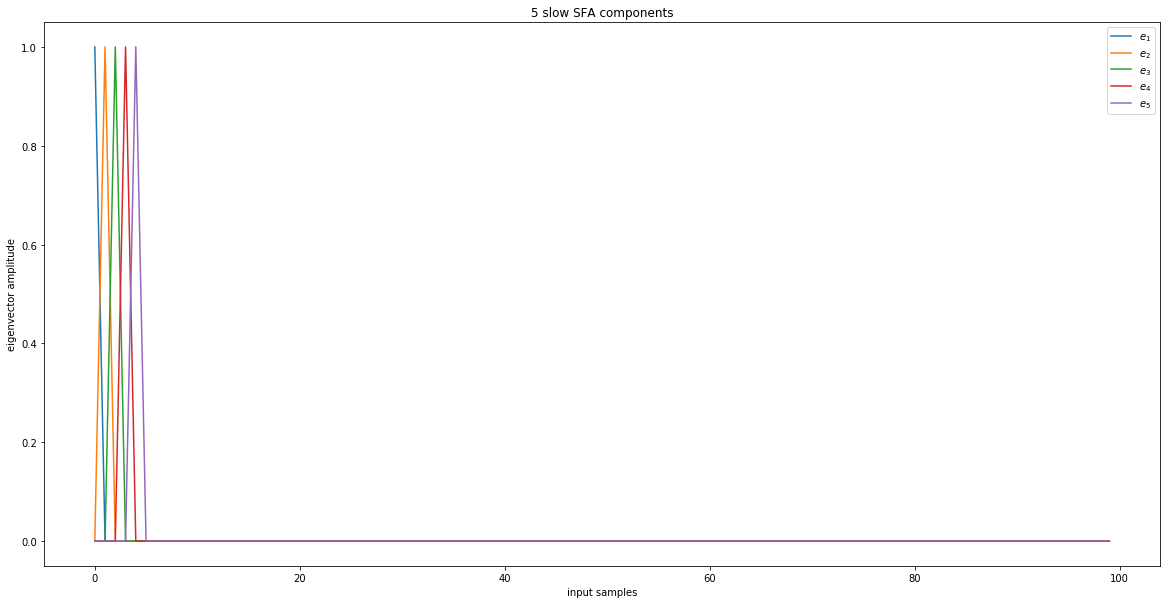

In [8]:
# Plotting eigenvectors

plt.figure(figsize=(20,10))
plt.plot(slow_W)
plt.xlabel('input samples')
plt.ylabel('eigenvector amplitude')
plt.title('5 slow SFA components')
plt.legend(['$e_1$', '$e_2$', '$e_3$', '$e_4$', '$e_5$'])
